In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pdb

from disp import set_font_size, set_n_x_ticks, set_n_y_ticks
from ntwk import LIFNtwk


# WEIGHTS
W_PC_G = 0.005
W_PC_G_I = 0.01
W_PC_START = .026
W_PC_PC = W_PC_START
W_PC_I = .05
W_I_PC = .11
W_I_I = 0  #0.05

W_UP_E = np.array([
    [0, 0, W_PC_START],  # E to 1
    [0, 0, 0],           # E to 2
    [0, 0, 0],           # E to 3
    [0, 0, 0],           # E to 4
    [0, 0, 0],           # E to 5
])

W_UP_A = np.array([
    [2*W_PC_G, 0, 0],  # A to 1
    [2*W_PC_G, 0, 0],  # A to 2
    [2*W_PC_G, 0, 0],  # A to 3
    [  W_PC_G, 0, 0],  # A to 4
    [       0, 0, 0],  # A to 5
])

W_UP_I = np.array([
    [0, W_PC_G_I, 0],  # I to 1
    [0, W_PC_G_I, 0],  # I to 2
    [0, W_PC_G_I, 0],  # I to 3
    [0, W_PC_G_I, 0],  # I to 4
    [0,        0, 0],  # I to 5
])

W_RCR_E = np.array([
    [      0, W_PC_PC,       0,       0, 0],  # E to 1
    [W_PC_PC,       0, W_PC_PC, W_PC_PC, 0],  # E to 2
    [      0, W_PC_PC,       0,       0, 0],  # E to 3
    [      0, W_PC_PC,       0,       0, 0],  # E to 4
    [      0,       0,       0,       0, 0],  # E to 5
])

W_RCR_A = np.array([
    [      0,       0,       0,       0, 0],  # E to 1
    [      0,       0,       0,       0, 0],  # E to 2
    [      0,       0,       0,       0, 0],  # E to 3
    [      0,       0,       0,       0, 0],  # E to 4
    [ W_I_PC,  W_I_PC,  W_I_PC,  W_I_PC, 0],  # E to 5
])

W_RCR_I = np.array([
    [0, 0, 0, 0, W_PC_I],  # I to 1
    [0, 0, 0, 0, W_PC_I],  # I to 2
    [0, 0, 0, 0, W_PC_I],  # I to 3
    [0, 0, 0, 0, W_PC_I],  # I to 4
    [0, 0, 0, 0,  W_I_I],  # I to 5
])


# INPUTS (order = G, G_I, PC)
R_G = 1100  # rate
R_G_I =  2000  # rate
T_PC_START = .1

# MEMBRANE PARAMS
T_M_PC = 0.05
E_L_PC = -0.065
V_TH_PC = -0.05
T_R_PC = 0.01

T_M_I = 0.005
E_L_I = -0.065
V_TH_I = -0.055
T_R_I = 0.001

T_M = np.array([T_M_PC, T_M_PC, T_M_PC, T_M_PC, T_M_I])
E_L = np.array([E_L_PC, E_L_PC, E_L_PC, E_L_PC, E_L_I])
V_TH = np.array([V_TH_PC, V_TH_PC, V_TH_PC, V_TH_PC, V_TH_I])
T_R = np.array([T_R_PC, T_R_PC, T_R_PC, T_R_PC, T_R_I])

# SYNAPTIC PARAMS
E_E = 0  # slow
E_A = 0  # fast
E_I = -0.08  # inh

T_E = 0.005  # slow
T_A = 0.001  # fast
T_I = 0.001  # inh

# SMLN PARAMS
DT = 0.0005
T = 0.2
N_TRIALS = 2

In [2]:
# make ntwk
ntwk = LIFNtwk(
    t_m=T_M, e_l=E_L, v_th=V_TH, v_r=E_L, t_r=T_R,
    es_syn={'E': E_E, 'A': E_A, 'I': E_I},
    ts_syn={'E': T_E, 'A': T_A, 'I': T_I},
    ws_up={'E': W_UP_E, 'A': W_UP_A, 'I': W_UP_I},
    ws_rcr={'E': W_RCR_E, 'A': W_RCR_A, 'I': W_RCR_I},
)

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


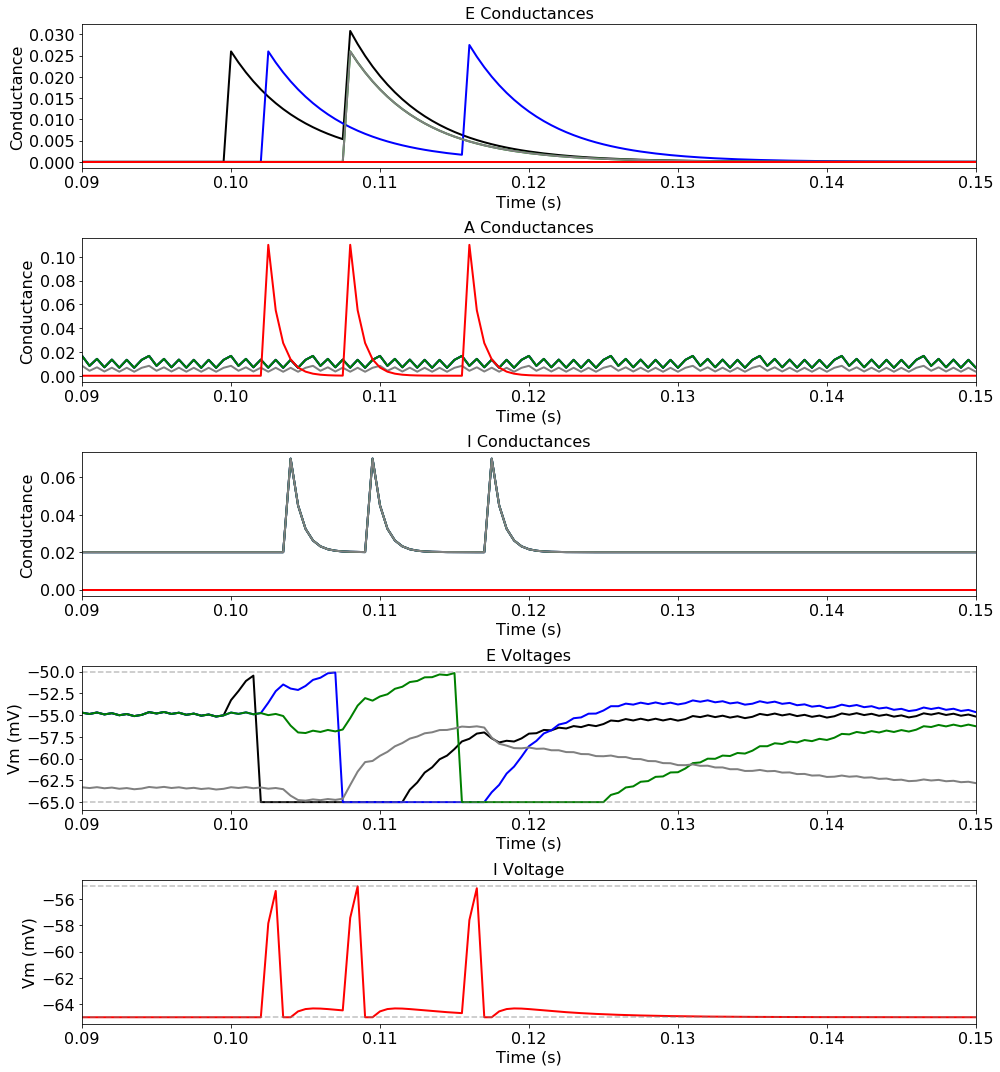

In [3]:
# create spks_up
t = np.arange(0, T, DT)

spks_up = np.zeros((len(t), 3))

# add G inputs
t_idxs_g = np.round(np.linspace(0, len(t)-1, T*R_G)).astype(int)
for t_idx_g in t_idxs_g:
    spks_up[t_idx_g, 0] += 1

# add G_I inputs
t_idxs_g_i = np.round(np.linspace(0, len(t)-1, T*R_G_I)).astype(int)
for t_idx_g_i in t_idxs_g_i:
    spks_up[t_idx_g_i, 1] += 1

# add PC inputs
t_idx_start = int(T_PC_START/DT)
spks_up[t_idx_start, 2] = 1

# run ntwk
rsp = ntwk.run(spks_up=spks_up, dt=DT, vs_0=E_L)

# plot results
fig, axs = plt.subplots(5, 1, figsize=(14, 15), tight_layout=True)
colors = ['k', 'b', 'g', 'gray', 'r']

# E conductances
for ctr in range(5):
    axs[0].plot(t, rsp.gs['E'][:, ctr], color=colors[ctr], lw=2)
    
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Conductance')
axs[0].set_title('E Conductances')
    
# A conductances
for ctr in range(5):
    axs[1].plot(t, rsp.gs['A'][:, ctr], color=colors[ctr], lw=2)
    
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Conductance')
axs[1].set_title('A Conductances')

# I conductances
for ctr in range(5):
    axs[2].plot(t, rsp.gs['I'][:, ctr], color=colors[ctr], lw=2)
    
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Conductance')
axs[2].set_title('I Conductances')

# E membrane voltages
for ctr in range(4):
    axs[3].plot(t, 1000 * rsp.vs[:, ctr], color=colors[ctr], lw=2)
    
axs[3].axhline(1000 * E_L_PC, color='gray', ls='--', alpha=0.5)
axs[3].axhline(1000 * V_TH_PC, color='gray', ls='--', alpha=0.5)

axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Vm (mV)')
axs[3].set_title('E Voltages')

# I membrane voltages
axs[4].plot(t, 1000 * rsp.vs[:, 4], color=colors[4], lw=2)
axs[4].axhline(1000 * E_L_I, color='gray', ls='--', alpha=0.5)
axs[4].axhline(1000 * V_TH_I, color='gray', ls='--', alpha=0.5)

axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Vm (mV)')
axs[4].set_title('I Voltage')

for ax in axs:
    ax.set_xlim(.09, .15)
    set_font_size(ax, 16)